## Import Libraries

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import tensorflow as tf
from IPython.display import display
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from numpy.random import seed
seed(888)


%matplotlib inline

In [3]:
#from tensorflow import set_random_seed
#set_random_seed(404)

## Constants

In [4]:
LOG_DIR = 'tensorboard_cifar_logs/'

NR_CLASSES = 10
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH*IMAGE_HEIGHT
COL0R_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COL0R_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## Get the data

In [5]:
(X_train_all, y_train_all), (X_test, y_test) = cifar10.load_data()

In [6]:
type(X_train_all[0])

numpy.ndarray

In [7]:
pic = array_to_img(X_train_all[7])

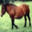

In [8]:
display(pic)

In [9]:
y_train_all[7][0]

7

In [10]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

Text(0.5, 0, 'Ship')

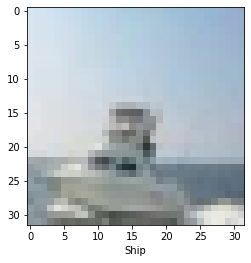

In [11]:
plt.imshow(X_train_all[100])
plt.xlabel(LABEL_NAMES[y_train_all[100][0]])

**Challenge:** Write a for loop to display the first 10 images from the X_train_all array in a row. Show the name of the label below the picture. Remove the ugly tick marks. Hint use matplotlb

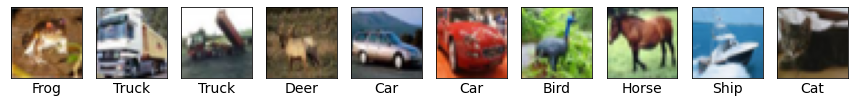

In [12]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train_all[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)

In [13]:
nr_images, x, y, c = X_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


## Preprocess Data

In [14]:
type(X_train_all[0][0][0][0])

numpy.uint8

In [15]:
X_train_all, X_test = X_train_all/255.0, X_test/255.0

In [16]:
type(X_train_all[0][0][0][0])

numpy.float64

In [17]:
X_train_all[0][0][0][0]

0.23137254901960785

In [18]:
X_train_all = X_train_all.reshape(X_train_all.shape[0], TOTAL_INPUTS)
print(f'shape of X_test is {X_train_all.shape}')

shape of X_test is (50000, 3072)


In [19]:
X_test = X_test.reshape(len(X_test), TOTAL_INPUTS)
print(f'shape of X_test is {X_test.shape}')

shape of X_test is (10000, 3072)


In [20]:
X_val = X_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
y_val.shape

(10000, 1)

**Challenge** Create two numpy arrays X_train and y_train that have the shape (40000, 3072) and (40000, 1) respectively. They should contain the last 40000 values from X_train_all and y_train_all respectively

In [21]:
X_train = X_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [22]:
X_train.shape

(40000, 3072)

### Create a small Dataset (for illustration)

In [23]:
X_train_xs = X_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

## Define the Neural Network using Keras

In [24]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS,  activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [25]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

**Challenge:** Create a third model(model_3), that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%

In [26]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [27]:
type(model_1)

keras.engine.sequential.Sequential

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


#### How did we come about the no. of paramenters?

In [29]:
m1_hidden1_dense = (32*32*3*128) + 128
m1_hidden2_dense = (128*64) + 64
m1_hidden3_dense = (64*16) + 16
m1_output_dense = (16*10) + 10
Total_params = m1_hidden1_dense + m1_hidden2_dense + m1_hidden3_dense + m1_output_dense

m1_hidden1_dense, m1_hidden2_dense, m1_hidden3_dense, m1_output_dense, Total_params

(393344, 8256, 1040, 170, 402810)

## Tensorboard (Visualising Learning)

In [30]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Succesfully created directory')

    return TensorBoard(log_dir=dir_paths)

## Fit the Model

In [31]:
samples_per_batch = 1000

In [32]:
# %%time

# nr_epochs = 150
# model_1.fit(X_train_xs, y_train_xs,
#             batch_size=samples_per_batch,
#             epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')],
#             verbose=0,
#            validation_data=(X_val, y_val))

In [33]:
# %%time

# nr_epochs = 150
# model_2.fit(X_train_xs, y_train_xs,
#             batch_size=samples_per_batch,
#             epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')],
#             verbose=0,
#            validation_data=(X_val, y_val))

In [34]:
%%time

nr_epochs = 150
model_1.fit(X_train, y_train,
            batch_size=samples_per_batch,
            epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')],
            verbose=0,
           validation_data=(X_val, y_val))

Succesfully created directory
CPU times: total: 15min 23s
Wall time: 2min 12s


In [35]:
%%time

nr_epochs = 150
model_2.fit(X_train, y_train,
            batch_size=samples_per_batch,
            epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')],
            verbose=0,
           validation_data=(X_val, y_val))

Succesfully created directory
CPU times: total: 29min 39s
Wall time: 4min 21s


In [36]:
%%time

nr_epochs = 150
model_3.fit(X_train, y_train,
            batch_size=samples_per_batch,
            epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')],
            verbose=0,
           validation_data=(X_val, y_val))

Succesfully created directory
CPU times: total: 30min 27s
Wall time: 4min 36s


## Predictions on Individual Images

In [37]:
X_val[0].shape    ### It is 1-D

(3072,)

In [38]:
## Let's expand using np.expand_dims()
test = np.expand_dims(X_val[0], axis=0)
test.shape

(1, 3072)

In [39]:
np.set_printoptions(precision=3)  ###
model_2.predict(test)

array([[0.008, 0.002, 0.12 , 0.122, 0.179, 0.146, 0.366, 0.055, 0.001,
        0.001]], dtype=float32)

In [40]:
## If we want to see the predictions for all the X_val
model_2.predict(X_val)

array([[7.717e-03, 2.267e-03, 1.199e-01, ..., 5.521e-02, 5.587e-04,
        1.372e-03],
       [2.291e-02, 3.050e-01, 3.139e-04, ..., 4.909e-03, 3.362e-01,
        3.265e-01],
       [2.695e-03, 2.857e-02, 6.057e-04, ..., 3.685e-03, 2.092e-02,
        9.338e-01],
       ...,
       [1.779e-02, 1.558e-01, 4.983e-03, ..., 3.354e-02, 3.645e-01,
        3.503e-01],
       [8.504e-03, 8.444e-01, 4.124e-03, ..., 2.299e-03, 2.210e-02,
        9.558e-02],
       [5.692e-04, 1.001e-04, 4.568e-02, ..., 5.833e-01, 2.294e-05,
        5.640e-04]], dtype=float32)

In [41]:
## If we want to know the predicted class

np.argmax(model_2.predict(X_val), axis=1)[0]

#predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=1)




6

In [42]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop to print out the value and the predicted value for the first 10 images in the valuation dataset

In [43]:
for i in range(10):
    predicted_val = np.argmax(model_2.predict(X_val), axis=1)[i]
    print(f'Actual value: {y_val[i][0]} vs. Predicted: {predicted_val}')

Actual value: 6 vs. Predicted: 6
Actual value: 9 vs. Predicted: 8
Actual value: 9 vs. Predicted: 9
Actual value: 4 vs. Predicted: 6
Actual value: 1 vs. Predicted: 1
Actual value: 1 vs. Predicted: 1
Actual value: 2 vs. Predicted: 2
Actual value: 7 vs. Predicted: 7
Actual value: 8 vs. Predicted: 8
Actual value: 3 vs. Predicted: 9


# Evaluation

In [44]:
model_2.metrics_names

['loss', 'accuracy']

In [45]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f'Test loss is {test_loss}, and Test accuracy is {test_accuracy}')

test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.4002 - accuracy: 0.5034
Test loss is 1.4001582860946655, and Test accuracy is 0.5034000277519226


(1.4001582860946655, 0.5034000277519226)

### Confusion Matrix

In [46]:
predictions = np.argmax(model_2.predict(X_val), axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [47]:
conf_matrix.shape

(10, 10)

In [48]:
conf_matrix[0]

array([ 80,  92,  73, 100, 116,  78, 127, 101, 136,  97], dtype=int64)

In [49]:
nr_rows, nr_cols = conf_matrix.shape[0], conf_matrix.shape[1]
nr_rows, nr_cols

(10, 10)

In [50]:
conf_matrix.min(), conf_matrix.max()

(47, 157)

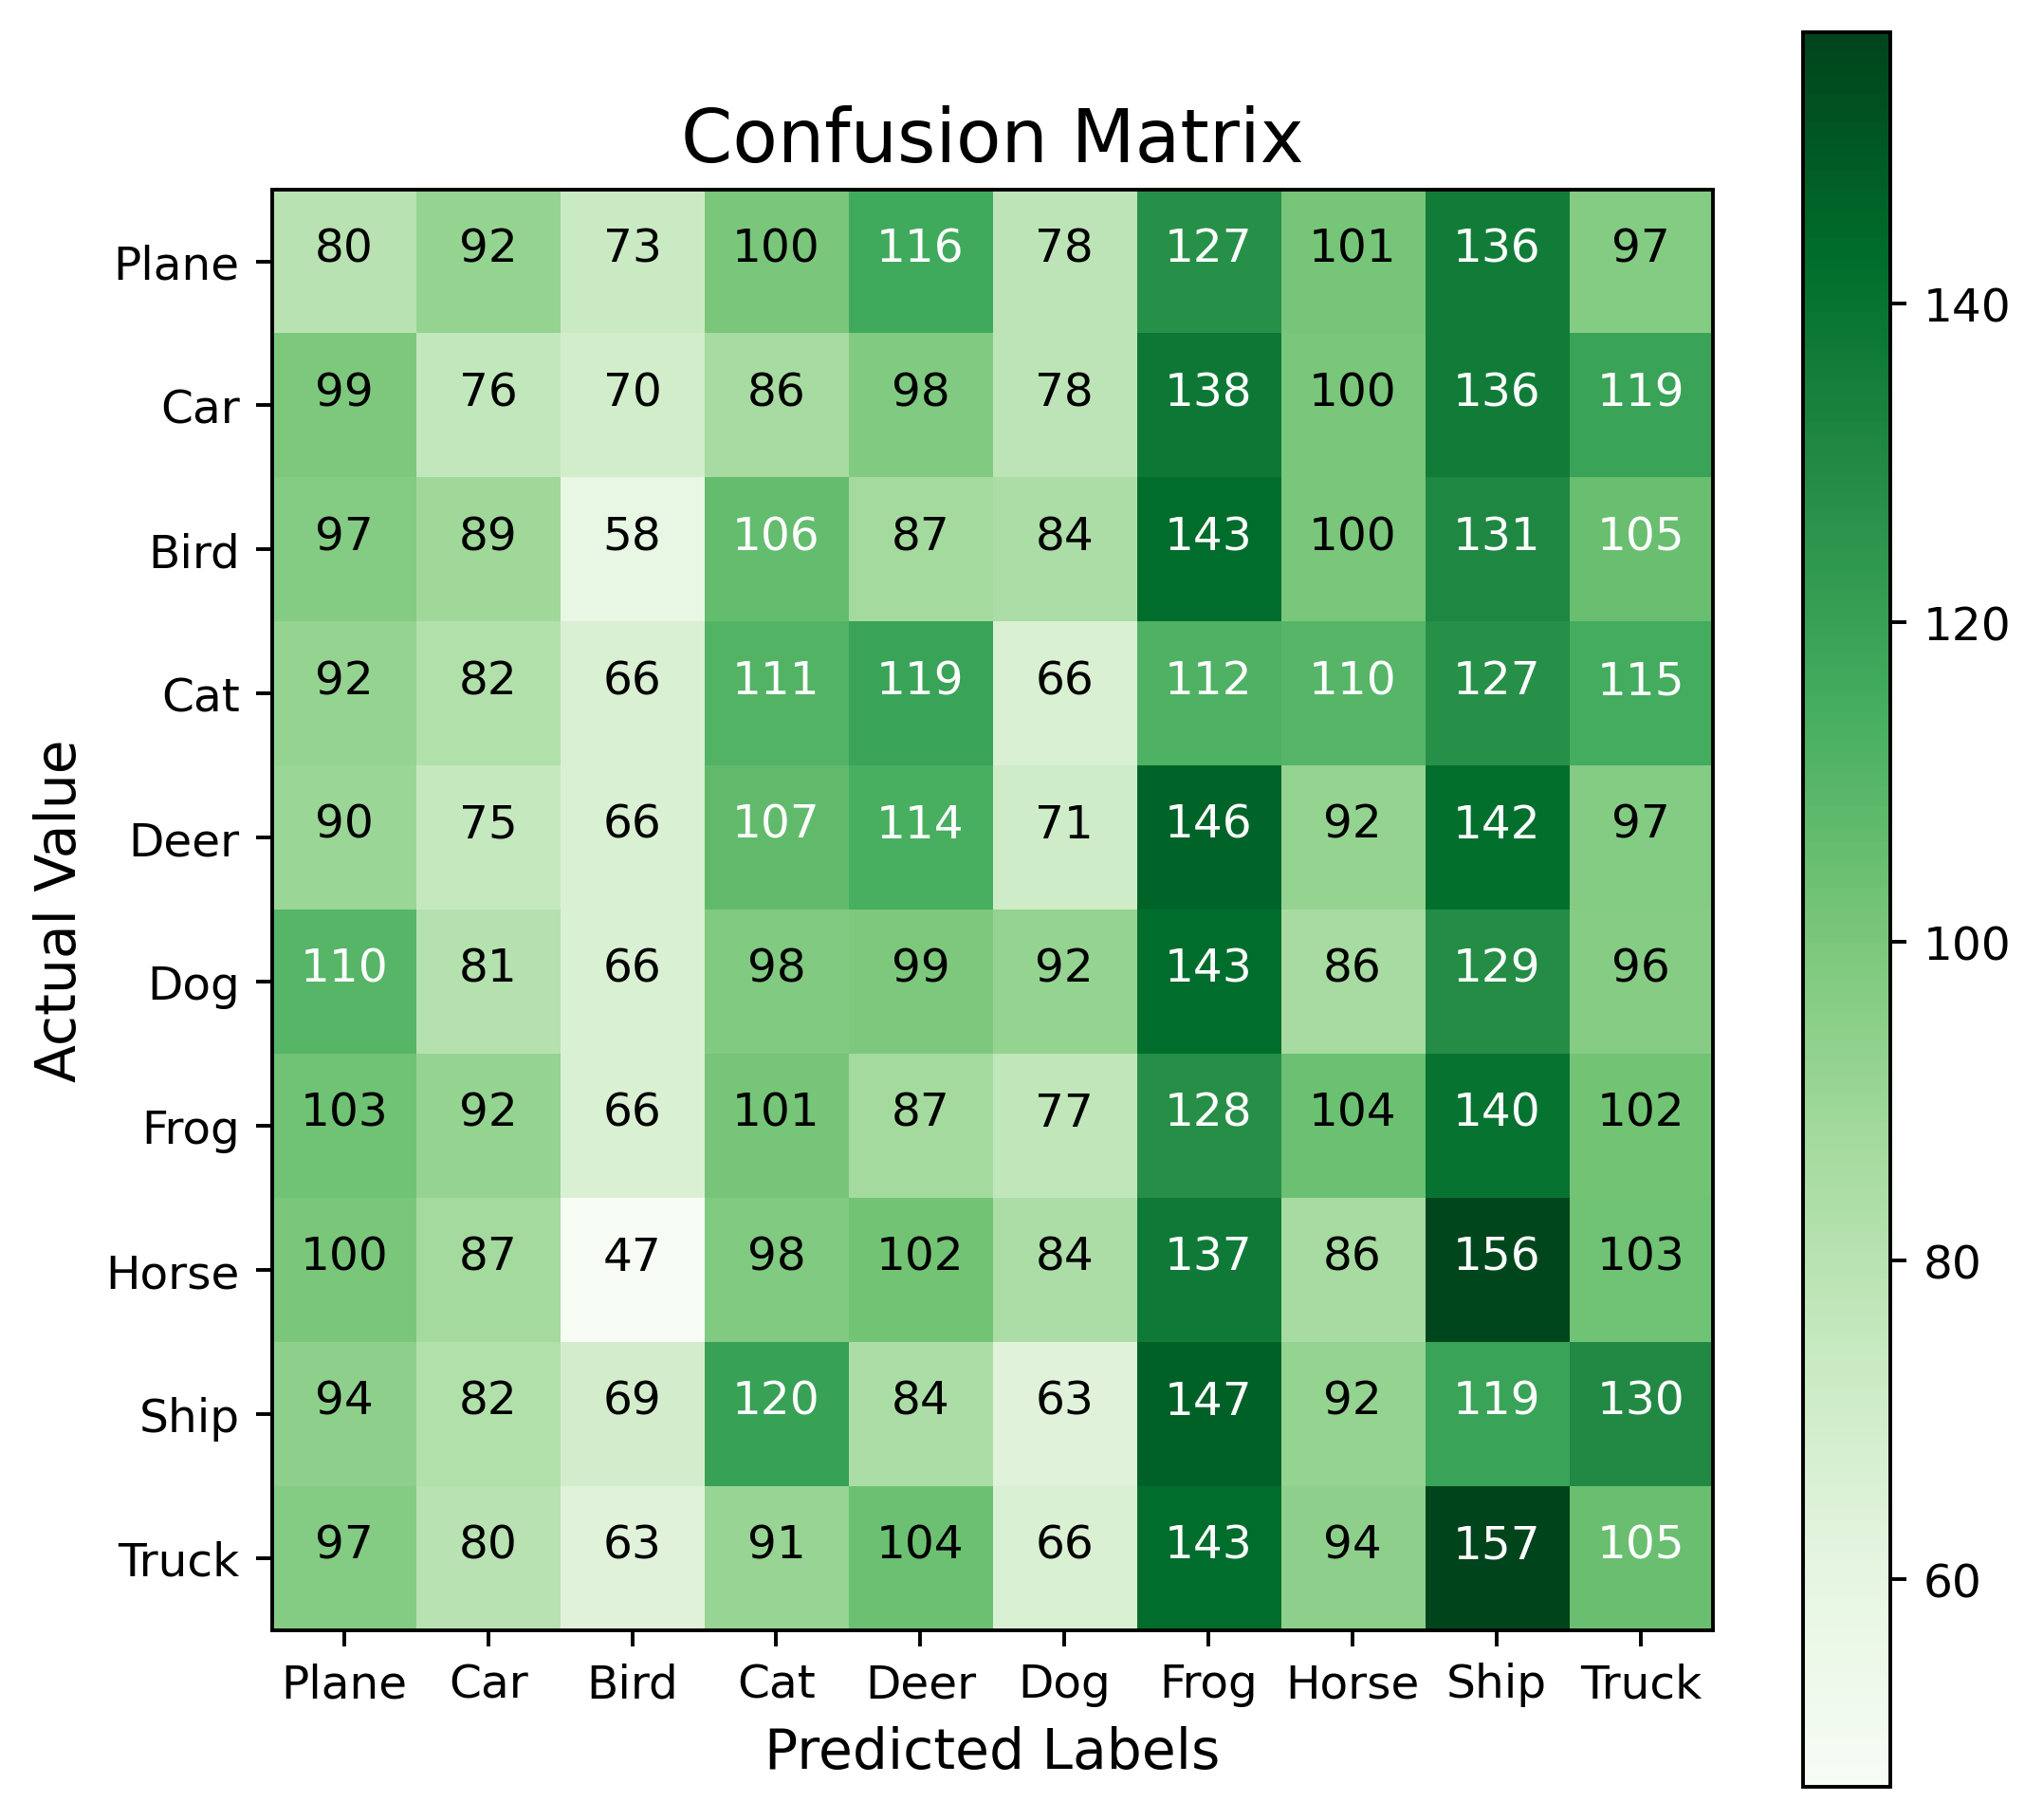

In [51]:
plt.figure(figsize=(7,7), dpi=350)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Value', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i,j], 
             horizontalalignment='center',
             color='white' if conf_matrix[i,j]>conf_matrix.max()/(1.5) else 'black')

plt.show()

**Challenge:** What do the numbers down the diagonal represent? What do the other numbers (excluding the number in the diagonal) in a single tow represent? Try to identify the false positives, false negatives, and the true positives in the confusion matrix.

In [52]:
# True Positive Values
np.diag(conf_matrix)

array([ 80,  76,  58, 111, 114,  92, 128,  86, 119, 105], dtype=int64)

In [53]:
recall = np.diag(conf_matrix)/np.sum(conf_matrix, axis=1)
recall

array([0.08 , 0.076, 0.058, 0.111, 0.114, 0.092, 0.128, 0.086, 0.119,
       0.105])

In [54]:
precision = np.diag(conf_matrix)/np.sum(conf_matrix, axis=0)
precision

array([0.083, 0.091, 0.09 , 0.109, 0.113, 0.121, 0.094, 0.089, 0.087,
       0.098])

In [55]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 9.69%


**Challenge:** Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole

In [56]:
avg_precision = np.mean(precision)
print(f'Model 2 recall score is {avg_precision:.2%}')

Model 2 recall score is 9.75%


In [57]:
f1_score = 2 * (avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'Model 2 f1-score score is {f1_score:.2%}')

Model 2 f1-score score is 9.72%
